In [9]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure


# **Calibración del histograma (o expansión del contraste)**

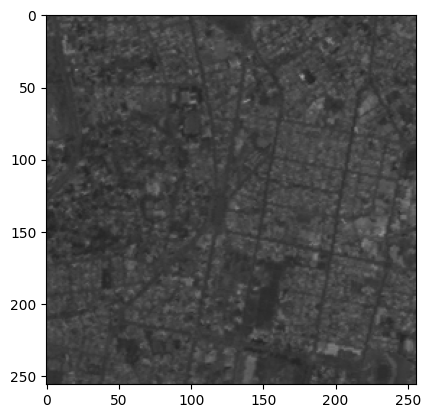

In [8]:
# Carga de Quito.png
quito = cv2.imread('Images/QUITO.png')
plt.imshow(quito)
plt.show()

### **Histograma de Quito**

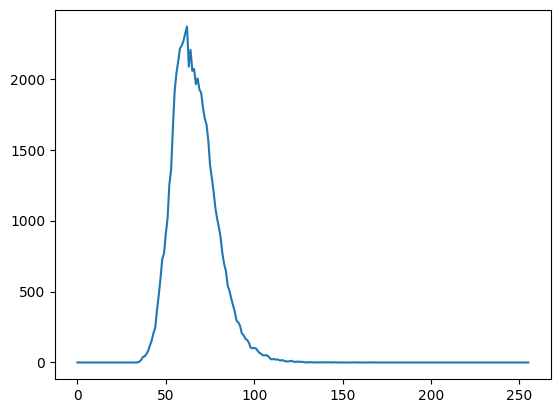

Mínimo: 35
Mínimo: 166


In [10]:
# Conversión y visualización de histograma
hits_quito = cv2.calcHist([quito], [0], None, [256], [0,256])
plt.plot(hits_quito)
plt.show()

# Mínimo y máximo Niveles de gris
print(f'Mínimo: {np.min(quito)}')
print(f'Mínimo: {np.max(quito)}')

### **Expansión del contraste**

# **Comparación entre diferentes transformaciones del histograma**

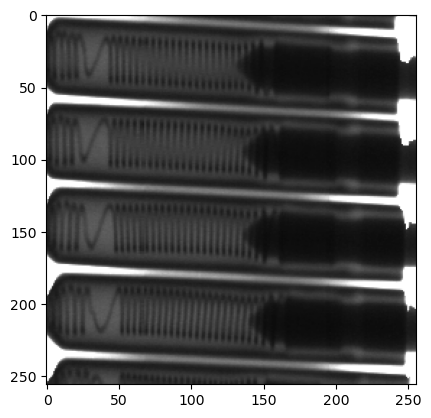

In [17]:
bougies = cv2.imread('images/BOUGIES.png')
plt.imshow(bougies, vmin=0, vmax=255)
plt.show()

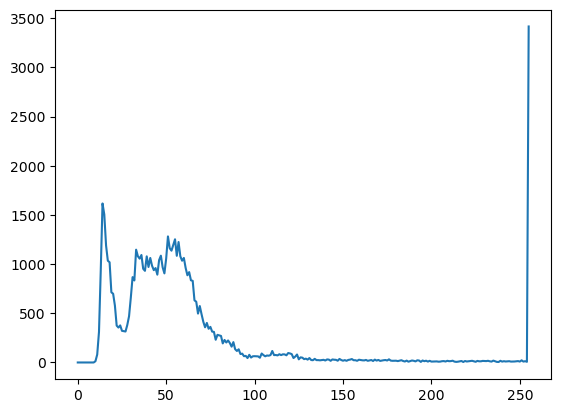

Mínimo: 10, Máximo: 255


In [13]:
hist = cv2.calcHist([bougies],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
miniomo = np.min(bougies)
maxiomo = np.max(bougies)
print(f'Mínimo: {miniomo}, Máximo: {maxiomo}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


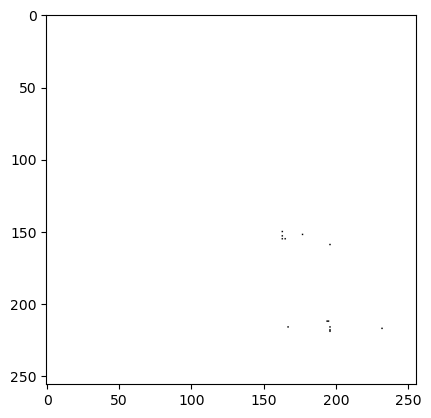

In [ ]:
bougieRescaled = exposure.rescale_intensity(bougies, in_range=(10,255), out_range=(0,255))
plt.imshow(bougieRescaled)
plt.show()
